# Wstęp do Sztucznej Inteligencji - rok akademicki 2020/2021

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Optymalizacja globalna: Problem plecakowy - Zadania
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.


## Problem plecakowy
Problem plecakowy to problem optymalizacji dyskretnej. W swojej najprostszej wersji może być sformułowany następująco.

Spośród `N` dostępnych przedmiotów możmy zabrać taką ich liczbę by suma ich wag nie przekraczała pewnej dopuszczalnej wartości (maksymalne obciążenie plecaka). Każdy przedmiot, oprócz wagi, ma przypisaną swoją wartość. 

Które przedmioty zabrać, aby ich sumaryczna wartość była jak największa, ale ich sumaryczna waga nie przekraczała dopuszczalnej maksymalnej wagi plecaka?

Mamy zatem do czynienia z problemem optymalizacji z ograniczeniami.

Przeczytaj więcej o problemie plecakowym: https://pl.wikipedia.org/wiki/Problem_plecakowy

## Prosty generator problemu plecakowego (0-1 knapsack problem)

Generujemy listę przedmiotów, z losowymi wagami oraz wartościami z podanych przedziałów.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

#wmin - minimalna waga przedmiotu
#wmax - maksymalna waga przedmiotu
#vmin - minimalna wartość przedmiotu
#vmax - maksymalna wartość przedmiotu
#items_num - liczba dostępnych przedmiotów
def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

Przykładowy problem plecakowy (zwróć uwagę, że możemy zagwarantować generowanie za każdym razem tego samego problemu poprzez ustawienie ziarna generatora liczb losowych).

In [53]:
num = 50  # liczba przedmiotów
wmin = 1  # minimlana waga
wmax = 100  # maksymalna waga
vmin = 1  # minimalna wartosc
vmax = 100  # maksymalna wartosc
knapsack_perc = 0.5  # pojemnosc plecaka jako procent sumy wag wszystkich przedmiotow

# ustawienie ziarna
np.random.seed(1111)

w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall) # pojemnosc plecaka

print('Problem plecakowy:')
print('pojemnosc plecaka:', W)
print('wagi:',w, 'suma:', Wall)
print('wartosci:',v, 'suma:', Vall)

Problem plecakowy:
pojemnosc plecaka: 1140
wagi: [29 56 82 13 35 53 25 23 21 12 15  9 13 87  9 63 62 52 43 77 95 79 77  5
 78 41 10 10 88 19  1 37  9 70 22 82 46 51 97 46 12 32 56 30 86 45 99 89
  1 88] suma: 2280
wartosci: [94 48 26 65 53 54 76 48 98 63 67 74 40 41 76  8 10 78 18 79 92 23  3 64
 22 43 24 75  8 36 78  6 98 33 49 31 15 21 30 44 14 75 55 22 71 95 94  9
 68 65] suma: 2479


## Zadanie 1 (obowiązkowe, 1pkt.) - rozwiązanie metodą brute force

Mamy problem plecakowy ze 100 przedmiotami. Chcemy sprawdzić każde możliwe rozwiązanie. Jeśli w ciągu sekundy moglibyśmy sprawdzić miliard rozwiązań, to ile lat by to trwało? Przyjmij, że rok ma 365 dni.

Otrzymaną liczbę lat przypisz do zmiennej o nazwie `liczba_lat`. Wynik zaokrąglij do pełnych lat w dół.

In [95]:
#Brute force : 2**n 
liczba_lat = (2**100/(10**9)/365/24/60/60)
print('Zajmie to: {} lat'.format(liczba_lat))

#robimy zaokraglenie:
if liczba_lat >= round(liczba_lat, ):
    print("\nZaokrąglenie w dół:")
    print(round(liczba_lat, ))
else:
        print("Zaokrąglenie w dół:")
        print(round(liczba_lat, )-1)

Zajmie to: 40196936841331.48 lat

Zaokrąglenie w dół:
40196936841331


## Kodowanie rozwiązania

Potencjalne rozwiązanie problemu plecakowego można zakodować jako wektor `0`/`1`, gdzie `1` oznacza wybranie przedmiotu do plecaka.

Warto skorzystać z kodowania `True`/`False` i tablic `numpy`, gdyż ułatwi to obliczenia (macierze True/False mogą służyć do indeksowania innych macierzy).

Przykładowo:

In [55]:
num = w.shape[0]
sol = np.random.randint(0, 2, size=num, dtype=np.bool)  # True oznacza, ze przedmiot jest wybrany

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
  True  True False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 24 25 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1212
Suma wartosci: 1046


## Rozwiązania dopuszczalne i niedopuszczalne - procedura naprawcza

Jeśli suma wag przekracza pojemność plecaka, to rozwiązanie jest rozwiązaniem niedopuszczalnym i jest całkowicie nieprzydatne.

Rozwiązanie niedopuszczalne można poddać procedurze naprawczej. Przykładowo, poniższa funkcja usuwa przedmioty z plecaka, dopóki nie powstanie rozwiązanie dopuszczalne.

In [56]:
# Usuwa losowe przedmioty, aż rozwiązanie stanie się dopuszczalne
# Jesli rowziazanie jest dopuszczlane, nie zostanie zmienione
def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx%num] == False:
            indx = indx + 1
        sol[indx%num] = False

__Przykładowa naprawa:__

In [57]:
correct_solution(w, v, W, sol)

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
 False False False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1093
Suma wartosci: 981


## Losowe, dopuszczalne rozwiązania

Bazując na powyższej procedurze, można zdefiniować funkcję generującą losowe, ale zawsze dopuszczalne rozwiązania.

In [79]:
def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=np.bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V

__Przykład użycia:__

In [59]:
sol = get_random_solution(w,v,W)

print('Rozwiązanie:', sol[0])
print('Lista wybranych przedmiotow:', np.arange(num)[sol[0]])
print('Suma wag:', sol[1])
print('Suma wartosci:', sol[2])

Rozwiązanie: [ True False  True False False False False  True  True  True  True False
  True  True  True False False  True  True  True False False False False
  True  True False  True False  True  True  True False  True  True False
 False False False False  True False  True  True False False  True  True
 False  True]
Lista wybranych przedmiotow: [ 0  2  7  8  9 10 12 13 14 17 18 19 24 25 27 29 30 31 33 34 40 42 43 46
 47 49]
Suma wag: 1115
Suma wartosci: 1329


## Random search

Powyższe funkcje można przełożyć na prostą heurystykę przeszukiwania losowego. Generujemy losowe (ale dopuszczalne) rozwiązania przez zadaną liczbę iteracji i zapamiętujemy najlepsze. Dodatkowo, zapisujemy oceny rozwiązań (wartość wszystkich przedmiotów w plecaku) by przedstawić je na wykresie.

In [77]:
def search_random(w,v,W,iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w,v,W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

__Przykładowe uruchomienie:__

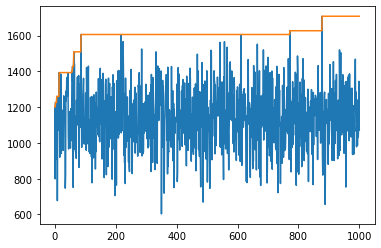

Najlepsze rozwiązanie: [ True False False  True  True False  True False  True False False  True
  True  True  True False False  True False  True False False  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True False False  True False False False  True False  True  True False
  True  True]
Przedmioty: [ 0  3  4  6  8 11 12 13 14 17 19 22 23 24 25 26 27 29 30 31 32 33 34 36
 39 43 45 46 48 49]
Suma wag: 1104
Suma wartosci: 1708


In [80]:
sol_random_search = search_random(w, v, W, 1000)

print('Najlepsze rozwiązanie:',sol_random_search[0])
print('Przedmioty:',np.arange(num)[sol_random_search[0]])
print('Suma wag:', sol_random_search[1])
print('Suma wartosci:', sol_random_search[2])

## Greedy search - procedura optymalizacji zachłannej

Problemem w powyższym podejściu jest fakt, że kolejne rozwiązania nie korzystają z uzyskanej już wiedzy o najlepszych do tej pory rozwiązaniach. Zatem inna prosta heurytyka polega na wystartowaniu z losowego rozwiązania, a następnie modyfikowaniu go poprzez losowe dodawanie przedmiotu do plecaka. Jeśli zmiana (po ewentualnej naprawie) wprowadza poprawę, pozostajemy przy takim rozwiązaniu, jeśli następuje pogorszenie, odrzucamy takie rozwiązanie i ponawiamy próbę.

Taka procedura jest przykładem optymalizacji zachłannej.

In [74]:
def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            correct_solution(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best 

__Przykładowe uruchomienie:__

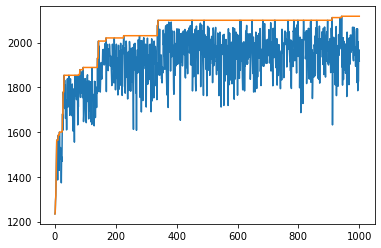

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True  True  True  True False False  True
 False False  True  True False  True  True False  True  True  True False
 False False False  True  True  True  True  True  True  True  True False
  True False]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 18 19 20 23 26 27 29 30 32 33
 34 39 40 41 42 43 44 45 46 48]
Suma wag: 1133
Suma wartosci: 2118


In [81]:
sol_greedy = search_greedy_improvement(w,v,W,1000)

print('Najlepsze rozwiązanie:',sol_greedy[0])
print('Przedmioty:',np.arange(num)[sol_greedy[0]])
print('Suma wag:', sol_greedy[1])
print('Suma wartosci:', sol_greedy[2])

## Dwie inne proste heurystyki

### Najpierw najbardziej wartościowe

Jak dobre rozwiązanie dostaniemy, jeśli do plecaka pakować będziemy najpierw najbardziej wartościowe przedmioty (o ile się zmieszczą)? Pomysł ten jest zaimplementowany w poniższej funkcji.

In [70]:
#Pakuje najpierw najbardziej wartościowe przedmioty
def get_value_first(w, v, W):
    ii = np.argsort(-v)
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [71]:
sol_value_first = get_value_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_value_first[0])
print('Przedmioty:',np.arange(num)[sol_value_first[0]])
print('Suma wag:', sol_value_first[1])
print('Suma wartosci:', sol_value_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True False  True  True  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 41 42 43 44 45 46 48 49]
Suma wag: 1137
Suma wartosci: 2161


### Najpierw te o najlepszym stosunku wartości do wagi

Inny pomysł to pakowanie najpierw przedmiotów o najlepszym stosunku wartości do wagi.

In [66]:
def get_ratio_first(w, v, W):
    ii = np.argsort(-v/w) #stosunek wartosci do wagi
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [67]:
sol_ratio_first = get_ratio_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_ratio_first[0])
print('Przedmioty:',np.arange(num)[sol_ratio_first[0]])
print('Suma wag:', sol_ratio_first[1])
print('Suma wartosci:', sol_ratio_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True  True  True  True False  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 40 41 42 44 45 46 48 49]
Suma wag: 1119
Suma wartosci: 2153


## Zadanie 2 (obowiązkowe, 3 pkt.)

Opracowane być mogą inne procedury naprawcze. Przykładowo, dla rozwiązania niedopuszczalengo, zamiast zmieniać losowe bity True na False, jak w funkcji `correct_solution`, można usuwać najpierw te przedmioty, które mają najgorszy stosunek wartości do wagi. Zaimplementuj taką procedurę. 

Porównaj jej działanie z funkcją `correct_solution` w metodach RandomSearch oraz GreedySearch. Przedstaw uśrednione wyniki (co najmniej 10 uruchomień) i wnioski.

TWÓJ PROGRAM:

In [96]:
### TWÓJ KOD TUTAJ
def implemented_ratio(w, v):
    array = [v/w for v,w in zip(v,w)]
    array = np.array(array)
    return array



def implemented_correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        array_ratio = implemented_ratio(w, v)
        array_ratio2 = array_ratio[sol]   
        indx = np.where(array_ratio2 == min(array_ratio2))
        indx2 = np.where(array_ratio == array_ratio2[indx])
        sol[indx2[0][0]] = False

Random search ---  rozwiązanie:


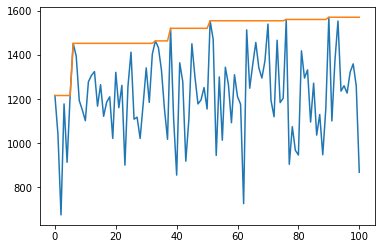

Beast:
 [False  True  True  True False  True  True  True  True  True False False
  True  True  True False False False False False False False False False
  True  True False  True False  True False False  True False  True  True
 False False False  True  True  True  True False  True  True  True False
  True  True]
Przedmioty:
 [ 1  2  3  5  6  7  8  9 12 13 14 24 25 27 29 32 34 35 39 40 41 42 44 45
 46 48 49]
Suma wag :  1120
Suma wartosci :  1570
Random search---OK, rozwiazanie---OK :


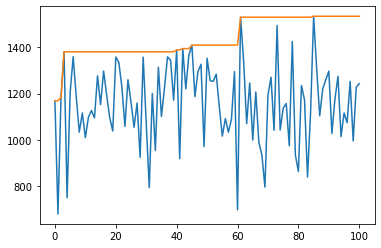

Beast:
 [False  True  True  True False False  True  True  True  True  True  True
  True  True False False False False False False  True False  True  True
  True False  True  True False  True False False  True  True  True False
  True  True False  True  True False False False  True  True False False
  True  True]
Przedmioty:
 [ 1  2  3  6  7  8  9 10 11 12 13 20 22 23 24 26 27 29 32 33 34 36 37 39
 40 44 45 48 49]
Suma wag :  1126
Suma wartosci :  1535


In [98]:

def get_random_solution(w, v, W, func):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=np.bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        func(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V



def search_random(w,v,W,iters,func):
    best_sol, best_W, best_V = get_random_solution(w,v,W, func)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w,v,W,func)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best


#######
print("Random search ---  rozwiązanie:")
sol_random_search = search_random(w, v, W, 100, implemented_correct_solution)

print('Beast:\n',sol_random_search[0])
print('Przedmioty:\n',np.arange(num)[sol_random_search[0]])
print('Suma wag : ', sol_random_search[1])
print('Suma wartosci : ', sol_random_search[2])

print("Random search---OK, rozwiazanie---OK :")
sol_random_search = search_random(w, v, W, 100, correct_solution)

print('Beast:\n',sol_random_search[0])
print('Przedmioty:\n',np.arange(num)[sol_random_search[0]])
print('Suma wag : ', sol_random_search[1])
print('Suma wartosci : ', sol_random_search[2])

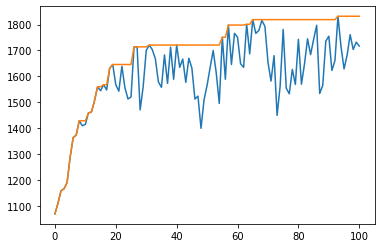

---------GREEDY-------------
Beast:

 [False False False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False False  True  True False False  True  True  True False  True False
 False False False False  True  True  True  True False  True  True False
  True False]
Przedmioty:
 [ 3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 26 27 30 31 32
 34 40 41 42 43 45 46 48]


Suma wag :  1132
Suma wartosci :  1832


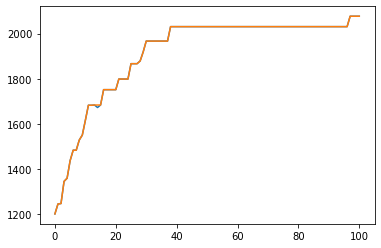

Beast:

 [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False False False  True False
 False False False  True  True  True  True  True  True  True  True False
  True  True]
Przedmioty:
 [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 34 39
 40 41 42 43 44 45 46 48 49]


Suma wag :  1140
Suma wartosci :  2077


In [108]:
def search_greedy_improvement(w, v, W, iters, fun):
    best_sol, best_W, best_V = get_random_solution(w,v,W, fun)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            fun(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best 

sol_greedy = search_greedy_improvement(w,v,W,100, correct_solution)
print('---------GREEDY-------------')
print('Beast:\n\n',sol_greedy[0])
print('Przedmioty:\n',np.arange(num)[sol_greedy[0]])
print('\n')
print('Suma wag : ', sol_greedy[1])
print('Suma wartosci : ', sol_greedy[2])

sol_greedy = search_greedy_improvement(w,v,W,100, implemented_correct_solution)

print('Beast:\n\n',sol_greedy[0])
print('Przedmioty:\n',np.arange(num)[sol_greedy[0]])
print('\n')
print('Suma wag : ', sol_greedy[1])
print('Suma wartosci : ', sol_greedy[2])

In [105]:

os.getcwd() 
#wnioski są w 3

'C:\\Users\\mrpas\\Downloads'

TWOJE WYNIKI i WNIOSKI:



SĄ W 3.ZADANIU


## Zadanie 3 (obowiązkowe, 6 pkt.)

Dostosuj swoją implementację algorytmu genetycznego do problemu plecakowego. 

- Jakie wyniki można uzyskać z jego pomocą? Czy działa on zawsze lepiej niż inne heurystyki?

- Która procedura naprawcza działa lepiej w algorytmie genetycznym?

- Przedstaw wnioski na podstawie uśrednionych wyników dla problemów plecakowych o rozmiarze 50, 100, 300.

- Problemy plecakowe i najlepsze znalezione rozwiązania zapisz do plików.

UWAGA! Po wygenerowaniu problemu plecakowego, przed uruchomieniem algorytmu genetycznego (lub innego) wywołaj:

`np.random.seed(int(time.time()))`

tak by problem plecakowy generował się ten sam, ale algorytmy miały szansę na nowy przebieg.

TWÓJ PROGRAM:

In [109]:
import time

initial best 1713
better solution of  1723 in 2
better solution of  1724 in 3
better solution of  1818 in 5
better solution of  1827 in 7
better solution of  1840 in 9
better solution of  1859 in 10
better solution of  1923 in 11
better solution of  1926 in 12
better solution of  1952 in 13
better solution of  1953 in 20
better solution of  1978 in 21
better solution of  1994 in 23
better solution of  2008 in 25
better solution of  2020 in 29
better solution of  2063 in 34
better solution of  2083 in 38
better solution of  2108 in 42
better solution of  2112 in 46
better solution of  2122 in 47
better solution of  2161 in 48


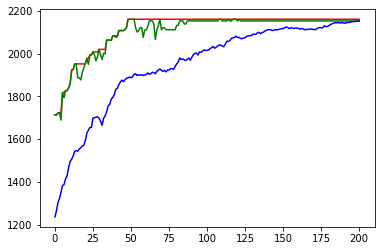

initial best 1729
better solution of  1733 in 2
better solution of  1747 in 3
better solution of  1862 in 4
better solution of  1894 in 9
better solution of  1906 in 13
better solution of  1918 in 14
better solution of  1985 in 15
better solution of  2007 in 18
better solution of  2038 in 21
better solution of  2048 in 41
better solution of  2082 in 46
better solution of  2099 in 47
better solution of  2107 in 54
better solution of  2108 in 62
better solution of  2113 in 67
better solution of  2129 in 73
better solution of  2153 in 79
better solution of  2161 in 112


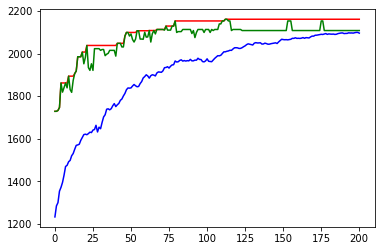

initial best 1684
better solution of  1695 in 2
better solution of  1803 in 5
better solution of  1861 in 9
better solution of  1866 in 12
better solution of  1954 in 13
better solution of  1970 in 24
better solution of  1997 in 29
better solution of  2002 in 38
better solution of  2003 in 44
better solution of  2048 in 45
better solution of  2067 in 52
better solution of  2100 in 56
better solution of  2108 in 95
better solution of  2129 in 97
better solution of  2161 in 106


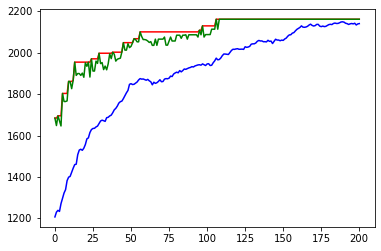

initial best 1737
better solution of  1897 in 2
better solution of  1929 in 5
better solution of  1952 in 7
better solution of  1973 in 12
better solution of  2092 in 16
better solution of  2104 in 25
better solution of  2107 in 30
better solution of  2139 in 32


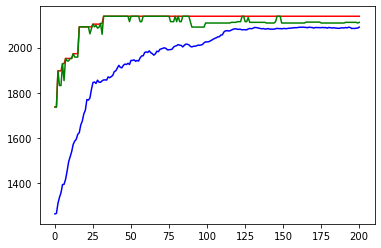

initial best 1702
better solution of  1762 in 2
better solution of  1784 in 4
better solution of  1786 in 5
better solution of  1899 in 6
better solution of  1930 in 11
better solution of  1954 in 13
better solution of  1958 in 21
better solution of  2005 in 22
better solution of  2010 in 26
better solution of  2011 in 27
better solution of  2024 in 28
better solution of  2054 in 29
better solution of  2094 in 32
better solution of  2118 in 33
better solution of  2130 in 73


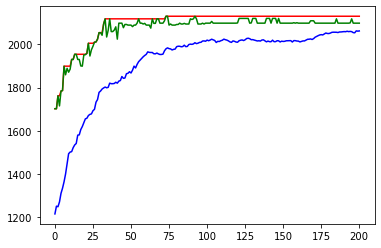

initial best 1723
better solution of  1787 in 5
better solution of  1822 in 10
better solution of  1824 in 12
better solution of  1832 in 13
better solution of  1884 in 14
better solution of  1910 in 15
better solution of  1913 in 16
better solution of  1939 in 18
better solution of  1962 in 20
better solution of  1970 in 21
better solution of  2039 in 23
better solution of  2066 in 24
better solution of  2085 in 71


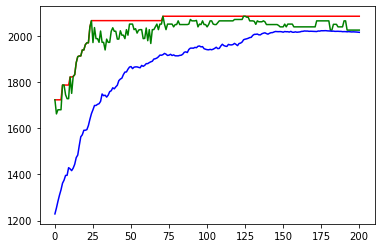

initial best 1727
better solution of  1761 in 1
better solution of  1763 in 2
better solution of  1768 in 3
better solution of  1787 in 4
better solution of  1831 in 6
better solution of  1851 in 8
better solution of  1920 in 10
better solution of  1921 in 16
better solution of  1989 in 19
better solution of  1991 in 22
better solution of  2036 in 23
better solution of  2065 in 26
better solution of  2088 in 37
better solution of  2095 in 39
better solution of  2097 in 41
better solution of  2121 in 42
better solution of  2122 in 47
better solution of  2126 in 62
better solution of  2153 in 76


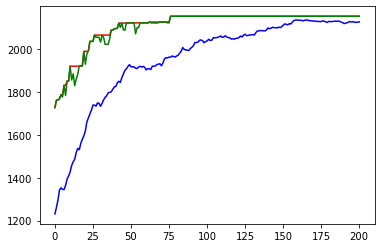

initial best 1798
better solution of  1815 in 1
better solution of  1855 in 5
better solution of  1892 in 13
better solution of  1904 in 19
better solution of  1924 in 23
better solution of  1974 in 25
better solution of  1999 in 29
better solution of  2009 in 32
better solution of  2031 in 34
better solution of  2050 in 36
better solution of  2053 in 53
better solution of  2066 in 54
better solution of  2118 in 60
better solution of  2122 in 62
better solution of  2139 in 66
better solution of  2153 in 69
better solution of  2161 in 133


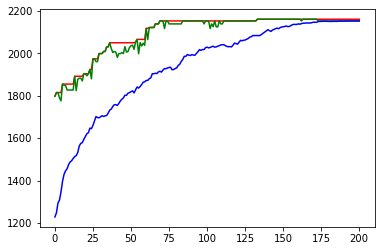

initial best 1729
better solution of  1754 in 1
better solution of  1780 in 3
better solution of  1846 in 4
better solution of  1907 in 11
better solution of  1962 in 12
better solution of  1974 in 15
better solution of  2019 in 18
better solution of  2050 in 20
better solution of  2083 in 23
better solution of  2086 in 27
better solution of  2088 in 30
better solution of  2161 in 46


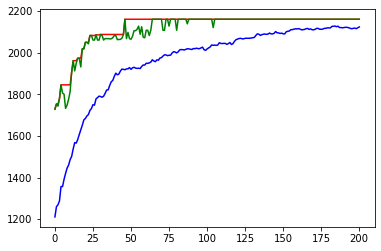

initial best 1700
better solution of  1763 in 1
better solution of  1801 in 2
better solution of  1895 in 6
better solution of  1985 in 8
better solution of  2002 in 9
better solution of  2059 in 19
better solution of  2072 in 36
better solution of  2088 in 37
better solution of  2117 in 40
better solution of  2139 in 50
better solution of  2153 in 97


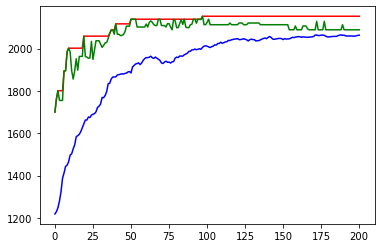

Problem plecakowy o wielkości 50 ---Średnia wartość :  2146.5
initial best 1680
better solution of  1681 in 2
better solution of  1716 in 5
better solution of  1744 in 7
better solution of  1798 in 9
better solution of  1827 in 13
better solution of  1886 in 14
better solution of  1915 in 26
better solution of  1924 in 31
better solution of  1934 in 34
better solution of  1977 in 38
better solution of  2029 in 42
better solution of  2063 in 49
better solution of  2090 in 52
better solution of  2115 in 59
better solution of  2121 in 60
better solution of  2125 in 67
better solution of  2139 in 74
better solution of  2143 in 78
better solution of  2151 in 84
better solution of  2153 in 89


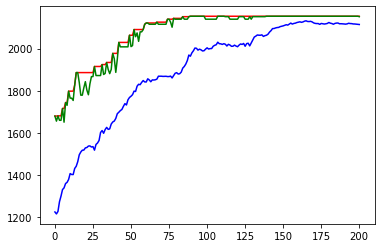

initial best 1735
better solution of  1805 in 3
better solution of  1838 in 9
better solution of  1884 in 13
better solution of  1886 in 16
better solution of  1976 in 18
better solution of  1981 in 20
better solution of  1996 in 24
better solution of  2011 in 25
better solution of  2079 in 38
better solution of  2090 in 46
better solution of  2103 in 47
better solution of  2124 in 48
better solution of  2153 in 124


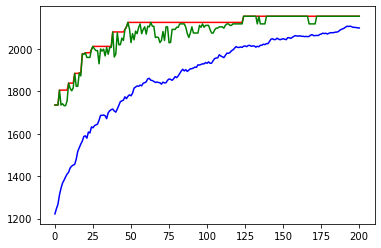

initial best 1672
better solution of  1722 in 1
better solution of  1778 in 4
better solution of  1785 in 7
better solution of  1800 in 8
better solution of  1851 in 9
better solution of  1899 in 10
better solution of  1920 in 14
better solution of  1940 in 17
better solution of  1955 in 19
better solution of  1964 in 20
better solution of  2007 in 22
better solution of  2041 in 24
better solution of  2053 in 30
better solution of  2077 in 35
better solution of  2127 in 41
better solution of  2139 in 72
better solution of  2161 in 73


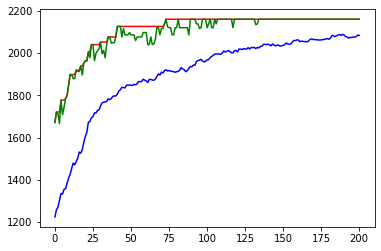

initial best 1658
better solution of  1690 in 1
better solution of  1857 in 2
better solution of  1858 in 10
better solution of  1866 in 11
better solution of  1885 in 15
better solution of  1896 in 16
better solution of  1938 in 18
better solution of  1943 in 20
better solution of  2005 in 22
better solution of  2054 in 25
better solution of  2068 in 43
better solution of  2089 in 49
better solution of  2110 in 56
better solution of  2135 in 61
better solution of  2153 in 129


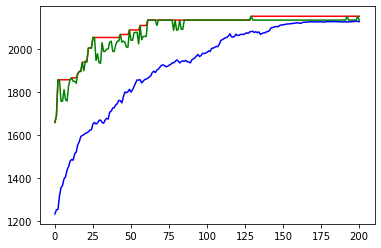

initial best 1653
better solution of  1721 in 2
better solution of  1747 in 5
better solution of  1828 in 6
better solution of  1830 in 11
better solution of  1832 in 14
better solution of  1874 in 15
better solution of  1903 in 17
better solution of  1934 in 21
better solution of  1963 in 22
better solution of  1994 in 30
better solution of  2043 in 31
better solution of  2064 in 34
better solution of  2092 in 43
better solution of  2153 in 45
better solution of  2161 in 55


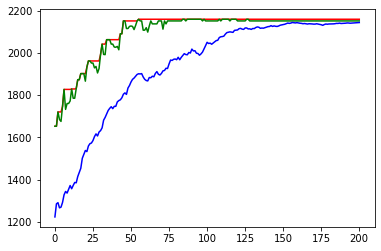

initial best 1551
better solution of  1657 in 1
better solution of  1720 in 3
better solution of  1807 in 4
better solution of  1916 in 5
better solution of  1925 in 9
better solution of  1976 in 10
better solution of  1981 in 13
better solution of  2005 in 18
better solution of  2043 in 26
better solution of  2060 in 34
better solution of  2080 in 38
better solution of  2083 in 39
better solution of  2110 in 41
better solution of  2122 in 43
better solution of  2135 in 44
better solution of  2153 in 56


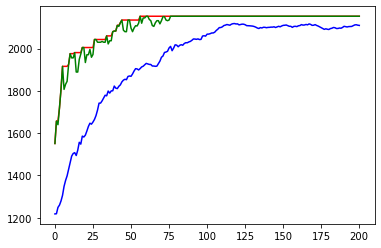

initial best 1748
better solution of  1951 in 7
better solution of  2029 in 21
better solution of  2032 in 26
better solution of  2033 in 32
better solution of  2049 in 37
better solution of  2055 in 46
better solution of  2062 in 47
better solution of  2098 in 50
better solution of  2122 in 54
better solution of  2161 in 59


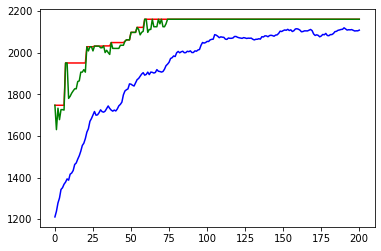

initial best 1678
better solution of  1773 in 1
better solution of  1779 in 4
better solution of  1806 in 5
better solution of  1843 in 8
better solution of  1873 in 11
better solution of  1884 in 14
better solution of  1900 in 18
better solution of  1968 in 19
better solution of  1993 in 20
better solution of  1998 in 25
better solution of  2076 in 26
better solution of  2083 in 32
better solution of  2095 in 34
better solution of  2098 in 36
better solution of  2103 in 39
better solution of  2114 in 41
better solution of  2151 in 48
better solution of  2153 in 56


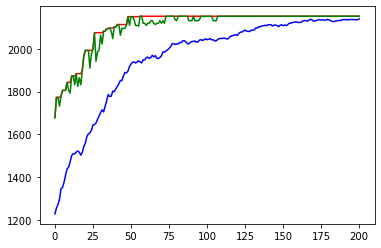

initial best 1842
better solution of  1918 in 11
better solution of  1922 in 16
better solution of  1940 in 19
better solution of  1956 in 24
better solution of  1971 in 35
better solution of  1982 in 41
better solution of  1997 in 44
better solution of  2013 in 48
better solution of  2034 in 50
better solution of  2037 in 52
better solution of  2086 in 53
better solution of  2090 in 56
better solution of  2112 in 59
better solution of  2117 in 71
better solution of  2153 in 72
better solution of  2161 in 87


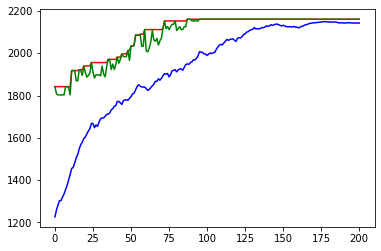

initial best 1775
better solution of  1817 in 3
better solution of  1820 in 10
better solution of  1877 in 16
better solution of  1882 in 18
better solution of  1924 in 24
better solution of  1972 in 25
better solution of  2002 in 29
better solution of  2086 in 30
better solution of  2137 in 36
better solution of  2143 in 48
better solution of  2153 in 51


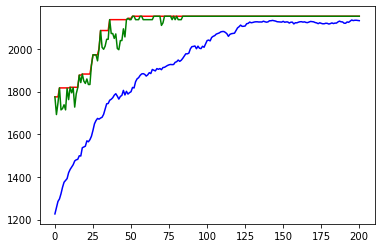

Problem plecakowy o wielkości 100 ---Średnia wartość ::  2156.2
initial best 1862
better solution of  1864 in 10
better solution of  1894 in 11
better solution of  1959 in 12
better solution of  1977 in 33
better solution of  1989 in 37
better solution of  1996 in 40
better solution of  2003 in 41
better solution of  2025 in 42
better solution of  2030 in 45
better solution of  2067 in 46
better solution of  2091 in 51
better solution of  2094 in 75
better solution of  2103 in 92
better solution of  2109 in 177


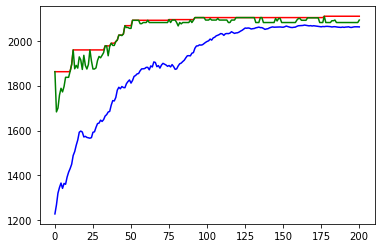

initial best 1699
better solution of  1822 in 1
better solution of  1827 in 6
better solution of  1841 in 8
better solution of  1911 in 9
better solution of  1974 in 13
better solution of  2026 in 21
better solution of  2079 in 22
better solution of  2103 in 33
better solution of  2117 in 38
better solution of  2132 in 45
better solution of  2135 in 47
better solution of  2138 in 63
better solution of  2153 in 101


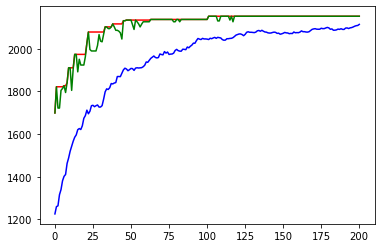

initial best 1718
better solution of  1719 in 6
better solution of  1779 in 7
better solution of  1820 in 8
better solution of  1856 in 11
better solution of  1877 in 22
better solution of  1889 in 23
better solution of  1903 in 24
better solution of  1905 in 25
better solution of  1973 in 26
better solution of  1988 in 33
better solution of  2051 in 34
better solution of  2066 in 97
better solution of  2089 in 119


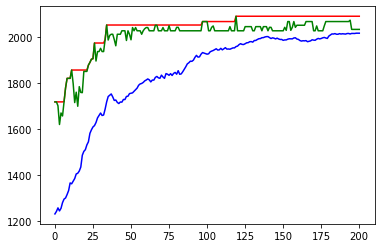

initial best 1869
better solution of  1872 in 10
better solution of  1893 in 11
better solution of  1934 in 15
better solution of  1960 in 16
better solution of  1986 in 19
better solution of  2011 in 22
better solution of  2054 in 30
better solution of  2076 in 31
better solution of  2085 in 37
better solution of  2097 in 39
better solution of  2100 in 78
better solution of  2120 in 80


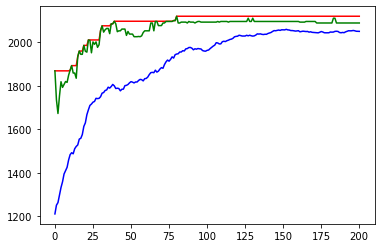

initial best 1857
better solution of  1935 in 3
better solution of  2003 in 5
better solution of  2046 in 19
better solution of  2074 in 20
better solution of  2075 in 37
better solution of  2078 in 40
better solution of  2080 in 45
better solution of  2161 in 46


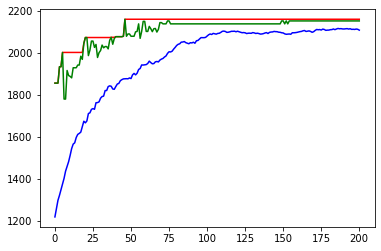

initial best 1752
better solution of  1789 in 1
better solution of  1833 in 2
better solution of  1840 in 3
better solution of  1877 in 8
better solution of  1921 in 10
better solution of  1952 in 12
better solution of  1953 in 16
better solution of  1995 in 17
better solution of  2002 in 21
better solution of  2010 in 34
better solution of  2035 in 35
better solution of  2049 in 37
better solution of  2068 in 40
better solution of  2127 in 43
better solution of  2143 in 80
better solution of  2153 in 84


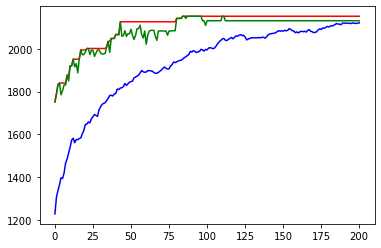

initial best 1705
better solution of  1738 in 1
better solution of  1751 in 4
better solution of  1804 in 5
better solution of  1825 in 6
better solution of  1838 in 11
better solution of  1873 in 12
better solution of  2027 in 13
better solution of  2034 in 16
better solution of  2042 in 17
better solution of  2074 in 19
better solution of  2085 in 25
better solution of  2089 in 35
better solution of  2113 in 37
better solution of  2127 in 48
better solution of  2153 in 51
better solution of  2161 in 65


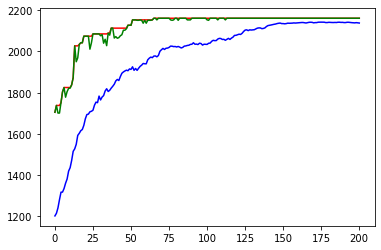

initial best 1574
better solution of  1648 in 1
better solution of  1682 in 4
better solution of  1683 in 5
better solution of  1779 in 8
better solution of  1865 in 18
better solution of  1906 in 21
better solution of  1983 in 22
better solution of  2053 in 25
better solution of  2071 in 43
better solution of  2087 in 44
better solution of  2089 in 48
better solution of  2100 in 50
better solution of  2153 in 52


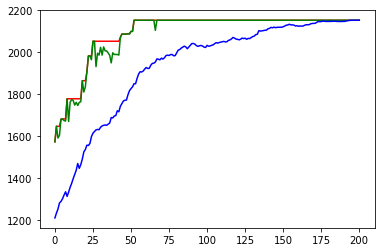

initial best 1701
better solution of  1706 in 1
better solution of  1775 in 3
better solution of  1821 in 6
better solution of  1904 in 9
better solution of  1923 in 11
better solution of  1931 in 13
better solution of  1955 in 14
better solution of  1964 in 15
better solution of  1985 in 25
better solution of  1993 in 26
better solution of  2044 in 29
better solution of  2061 in 31
better solution of  2062 in 45
better solution of  2063 in 50
better solution of  2119 in 56
better solution of  2123 in 63
better solution of  2161 in 68


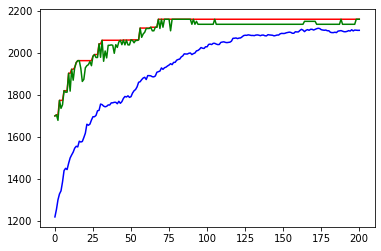

initial best 1719
better solution of  1772 in 1
better solution of  1832 in 2
better solution of  1847 in 7
better solution of  1910 in 9
better solution of  1922 in 11
better solution of  1987 in 17
better solution of  1995 in 19
better solution of  2047 in 20
better solution of  2088 in 25
better solution of  2095 in 27
better solution of  2109 in 28
better solution of  2125 in 50
better solution of  2153 in 66
better solution of  2161 in 70


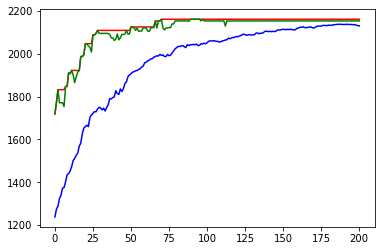

Problem plecakowy o wielkości 300 ---Średnia wartość :  2142.1
--------------ZAPISAŁEM DO PLIKÓW---------------


In [106]:


def gen_pop(w, v, W, pop_size):
    pop = np.random.randint(2, size = (pop_size, len(w)), dtype=np.bool)
    for i in range(len(pop)):
        implemented_correct_solution(w,v,W,pop[i]);
    return pop


def evaluate(pop, v):
    evaluated = []
    for i in range(len(pop)):
        evaluated.append(v[pop[i]].sum())
    return np.array(evaluated)


def select(pop, evals):
    intervals = [0]
    current = 0

    for i,e in enumerate(evals):
        prop = e/evals.sum()
        current = prop + current
        intervals.append(current)

    intervals = np.array(intervals)
    new_pop = []
    for i,e in enumerate(np.random.random(evals.size)):
        for j,interval in enumerate(intervals):
            if interval >= e:
                new_pop.append(pop[j - 1])
                break
    return np.array(new_pop)


def xover(pop, pk, w,v,W):  # p - prawdopodobienstwo krzyzowania
    new_pop = []
    for i,e in enumerate(pop):
        if np.random.random() <= pk:
            next_index = (i+1)%pop.shape[0]
            cross_point = np.random.randint(pop.shape[1])
            new_pop.append(np.concatenate((e[:cross_point], pop[next_index][cross_point:])))
        else:
            new_pop.append(e)
    for i in range(len(new_pop)):
        implemented_correct_solution(w,v,W,new_pop[i]);
    return np.array(new_pop)


def mutate(pop, pm, w,v,W):  # p - prawdopodobienstwo mutacji
    new_pop = np.array(pop)
    for i,e in enumerate(new_pop):
        if np.random.random() <= pm:
            index = np.random.randint(new_pop.shape[1])
            e[index] = 1 if e[index] == 0 else 1
    for i in range(len(new_pop)):
        implemented_correct_solution(w,v,W,new_pop[i]);
    return np.array(new_pop)


def evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations):
    pop = gen_pop(w,v,W, pop_size)
    evals = evaluate(pop, v)
    i = np.argmax(evals)
    best = pop[i].copy()
    best_V = evals[i]
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]
    
    print('initial best', best_V)
    
    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w,v,W)
        pop = mutate(pop, pmutate, w,v,W)
        evals = evaluate(pop, v)
        ii = np.argmax(evals)
        temp_best_v = evals[ii]
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i+1
            best = pop[ii].copy()
            print('better solution of ', best_V, 'in', best_iter)
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))
    
    plt.plot(v_best, 'r')
    plt.plot(v_all, 'g')
    plt.plot(v_mean, 'b')
    plt.show()
    return best, w[best].sum(), best_V


def gen_problem(num):
    np.random.seed(134124)
    w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
    Wall = w.sum()
    Vall = v.sum()
    W = int(knapsack_perc * Wall) # pojemnosc 

results = []
max_sol = 0

gen_problem(50)
np.random.seed(int(time.time()))
for i in range(10):
    solution = evolve_knapsack(w, v, W, 200, 0.7, 0.01, 200)[2]
    results.append(solution)
    if solution > max_sol:
        max_sol = solution
f = open("PLECAK_50.txt", "w", encoding="utf-8")
f.write("Wagi: " + str(w) + "\n")
f.write("Wartości: " + str(v) + "\n")
f.write("Maksymalna waga: " + str(W) + "\n")
f.write("Beast : " + str(max_sol) + "\n")
f.close()
print("Problem plecakowy o wielkości 50 ---Średnia wartość : ", np.array(results).mean())

results = []
max_sol = 0

gen_problem(100)
np.random.seed(int(time.time()))
for i in range(10):
    solution = evolve_knapsack(w, v, W, 200, 0.7, 0.01, 200)[2]
    results.append(solution)
    if solution > max_sol:
        max_sol = solution
f = open("PLECAK_100.txt", "w", encoding="utf-8")
f.write("Wagi: " + str(w) + "\n")
f.write("Wartości: " + str(v) + "\n")
f.write("Maksymalna waga: " + str(W) + "\n")
f.write("Beast: " + str(max_sol) + "\n")
f.close()
print("Problem plecakowy o wielkości 100 ---Średnia wartość :: ", np.array(results).mean())

results = []
max_sol = 0

gen_problem(300)
np.random.seed(int(time.time()))
for i in range(10):
    solution = evolve_knapsack(w, v, W, 200, 0.7, 0.01, 200)[2]
    results.append(solution)
    if solution > max_sol:
        max_sol = solution
f = open("PLECAK_300.txt", "w", encoding="utf-8")
f.write("Wagi: " + str(w) + "\n")
f.write("Wartości: " + str(v) + "\n")
f.write("Maksymalna waga: " + str(W) + "\n")
f.write("Beast: " + str(max_sol) + "\n")
f.close()
print("Problem plecakowy o wielkości 300 ---Średnia wartość : ", np.array(results).mean())
print("--------------ZAPISAŁEM DO PLIKÓW---------------")

TWOJE WYNIKI i WNIOSKI:

1)Jakie wyniki można uzyskać z jego pomocą? Czy działa on zawsze lepiej niż inne heurystyki?

Wyniki uzyskane przez algorytm genetyczny są zadowalające - Greedy Search. Z obserwacji najważniejszym  jest : odpowiednia ilość populacji.
Zmiana ilość generacji  wpływa MINIMALNIE  na wynik końcowy.

2)Która procedura naprawcza działa lepiej w algorytmie genetycznym?

Procedura naprawcza z wyborem elementu z najgorszym stosunkiem wartości do wagi. 
Czemu? -Bo,pokazuje to poprzez   uzyskiwanie przez procedurę lepszych wartości względem wad.

3)Średnie wartości  --- Przykładowe wyniki (dla (w, v, W, 200, 0.7, 0.01, 200))

Problem plecakowy o wielkości 50 ---Średnia wartość :  2145.7
Problem plecakowy o wielkości 100 ---Średnia wartość ::  2155.4
Problem plecakowy o wielkości 300 ---Średnia wartość :  2146.5

4)Problemy plecakowe i najlepsze znalezione rozwiązania zapisz do plików.
OK-ZROBIONE

&copy; Katedra Informatyki, Politechnika Krakowska